<a href="https://colab.research.google.com/github/engbJapan/Programming/blob/main/VNCinCellJapanXfce4OpenAiGymInveders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ColabでVNCビューワをセル出力に出して、OpenAiGymのインベーダを表示したColabNoteBook:

実録、ノーカットキャプチャー動画は[こちら](https://youtu.be/racsbfupnNk)

## 一気にＮＯＶＮＣ（X11デスクトップ環境Viewer）表示まで実施する

途中に、VNCのログインパスワードの入力があります

手法は[Qiita](https://qiita.com/engbJapan/items/f39b2f927de290e6a65f)に投稿したものを纏めて、ＮＧＲＯＫトークンをコード内で設定しておく事もできるようにした。


In [1]:
#@title
# 関数定義など開始
import os as iＯＳ
from IPython.display import clear_output as i出力クリア
import portpicker as iポートピック
#https://docs.python.org/ja/3/library/shlex.html#module-shlex
from shlex import quote as i安全なシェル向けクオーティング
from shlex import split as iクオーティングsplit
from time import sleep as fスリーブ

トークン="" # NGROKの無料プラントークンコードを"〜"の中に貼り付けでOK

システムコール=get_ipython().system_raw

ワークディレクトリ="/content"

def 指定の変数の値を取得します(変数名):
  return iＯＳ.environ[変数名]

def 指定の変数の値を設定します(変数名,値):
  iＯＳ.environ[変数名] = 値
  return 指定の変数の値を取得します(変数名)

def 環境変数にメッセージ出して入力を設定(
      変数名
      ,メッセージ="入れてください："
      ,デホルト値指定=""
      ,ダメな文字列=""):
  環境変数名 = f"ENGBJ_{変数名}"
  良い = False
  while not 良い :
    入力値 = i安全なシェル向けクオーティング(input(f"{メッセージ}:"))
    指定の変数の値を設定します(
        環境変数名
      ,(入力値 if (  デホルト値指定 == "" or 入力値 != "" )  else デホルト値指定)
    )
    if (ダメな文字列!="" and ダメな文字列==入力値):
      print("それは入力してはいけません！もう一度！！")
      continue
    良い = (input(
          f"{指定の変数の値を取得します(環境変数名)}　これで良いです？(y/n):"
            ) == "y")

  return 指定の変数の値を取得します(環境変数名)
# 関数定義など終了

# 日本語化、時間も開始
%cd {ワークディレクトリ}
%pwd
try:
  open(f"{ワークディレクトリ}/.env.root",mode="r").close()
  print("""
  既に実行されています。
 !date  コマンド等で確認してください。
 日本化していなければ、
「ランタイムの接続解除して削除」でクリアーにしてリトライ下さい
    """)
except FileNotFoundError:
  !bash <( wget -O - -qq https://engbjapan.github.io/Programming/TestG/IamJapanese.rc )
  環境変数格納 = !cat /content/.env.root
  for 個々の環境変数定義 in  環境変数格納 :
    (変数名, 設定値) = 個々の環境変数定義.split("=",maxsplit=1)
    iＯＳ.environ[変数名]=f"{設定値}"

i出力クリア(True)
print(f"{'※'*16}")
!env|sort
!date
# 日本語化、時間も終了


#トークンを環境変数「ENGBJ_toke」と変数「トークン」に設定
if トークン=="" :
  トークン=環境変数にメッセージ出して入力を設定("token","ＮＧＲＯＫのトークンをコピペ：") 
else:
  指定の変数の値を設定します("ENGBJ_token",トークン)
  
print("モジュールのインストール開始")
!bash <( wget -O - -qq https://engbjapan.github.io/Programming/TestG/inst.rc ) #ググマーク対策
## Xfce4デスクトップへ変更
!apt -qq install xfce4 
print("モジュールのインストール終了")

i出力クリア(True)

print(f"ＶＮＣパスワード等設定 {ワークディレクトリ}/passwd にパスファイルを作成します")
print(f"パスワード二回入力後に「n」で終えてください")
!bash  <( wget -O - -qq https://engbjapan.github.io/Programming/TestG/inst2.rc )
print("ＶＮＣパスワード等設定終了")

i出力クリア(True)

# ＮＧＲＯＫのＤＬと解凍
print("ＮＧＲＯＫのＤＬと解凍")
%cd {ワークディレクトリ}
!wget -qq https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.tgz
!rm -f ./ngrok
!tar xzvf ./ngrok-v3-stable-linux-amd64.tgz
!rm -f ./ngrok-v3-stable-linux-amd64.tgz
print("ＮＧＲＯＫのＤＬと解凍終了")


# 環境変数整備
print("環境変数整備")
指定の変数の値を設定します("DISPLAY",":99.0") # XappのDISPLAYをＴｉｇｅｒＶＮＣのディスプレイにする
内部ＷＥＢＳＯＣＫＩＦＹ用ポート = iポートピック.pick_unused_port()
指定の変数の値を設定します("ENGBJ_WWWPort",str(内部ＷＥＢＳＯＣＫＩＦＹ用ポート)) # XappのDISPLAYをＴｉｇｅｒＶＮＣのディスプレイにする
print("環境変数整備終了")
print(f"内部ＷＥＢＳＯＣＫＩＦＹ用ポート:{内部ＷＥＢＳＯＣＫＩＦＹ用ポート}")
!env|sort > $ワークディレクトリ/.env.run
print(f"""
以下にここまでの環境変数を退避
{ワークディレクトリ}/.env.run
""")

# サーバー起動開始
print("ＶＮＣサーバとＷｅｂＳｏｃｋｉｆｙ切る")
!vncserver -kill :99
!killall websockify
print("ＶＮＣサーバとＷｅｂＳｏｃｋｉｆｙ切る終了")
print("ＴｉｇｅｒＶＮＣサーバー起動")
#システムコール(f"vncserver --PasswordFile {ワークディレクトリ}/passwd -localhost yes -xstartup `which fluxbox` -geometry 900x600 :99")
## Xfce4デスクトップへ変更
システムコール(f"vncserver --PasswordFile {ワークディレクトリ}/passwd -localhost yes -xstartup `which xfce4-session` -geometry 900x600 :99")
print("ＴｉｇｅｒＶＮＣサーバー起動終了")
fスリーブ(3.0)
print("ＷｅｂＳｏｃｋｉｆｙ起動")
システムコール(f"websockify -D --web=/usr/share/novnc/  {内部ＷＥＢＳＯＣＫＩＦＹ用ポート} localhost:5999")
print("ＷｅｂＳｏｃｋｉｆｙ起動終了")
print(f"内部ＷＥＢＳＯＣＫＩＦＹ用ポート={内部ＷＥＢＳＯＣＫＩＦＹ用ポート}")

i出力クリア(True)

# ＮＧＲＯＫ起動とトンネル情報取得
!bash <( wget -O - -qq https://engbjapan.github.io/Programming/TestG/tonne.rc)
print("定義したすべてのトンネルを起動")
システムコール(f"{ワークディレクトリ}/ngrok start --all --config {ワークディレクトリ}/grocky.yml &")
fスリーブ(3.0)
print(f"""Gets tunnel-paplica by the way Agent API request.
＊＊＊ここで先に進まない場合はＮＧＲＯＫのセッションリミットが超えています(フリープランは１トンネルセッションです！)＊＊＊
これは、Colabのブラウザを急に閉じた場合,ＮＯＶＮＣを切らなかった場合etcにおいて、
時間を待たず実行したなどが考えられます、今の所待つしかないのかな。。。。
""")
ＮＧＲＯＫホスト出力= !wget -O - -qq http://localhost:4040/api/tunnels  | perl -pe 's/^.+(public_url)[^h]+(https:[^"]+).+$/${2}/g' 
ＮＧＲＯＫホスト名=ＮＧＲＯＫホスト出力[0]
i出力クリア(True)

print(f"""
間もなくIFRAMEとしてＮＯＶＮＣへの接続画面が開きます!!

ＮＧＲＯＫのサイト訪問画面が出たら「Vist」してください。
この中でやる分には、Colabの利用ポリシーに反しません（不特定多数への公開行為ではないためです）
****************************************************************************************
①ＮＧＲＯＫホスト/vnc.html　(emmbeded IFRAME by Google.Colab Method)
②Colab内の{内部ＷＥＢＳＯＣＫＩＦＹ用ポート}ポート⇔Ｗｅｂｓｏｃｋｆｙ⇄ＮＯＶＮＣ(HTML5,CSS）
                              ↘ＴｉｇｅｒＶＮＣサーバー（Colab内の5999ポート）
                                    ⇔X11-unix/X99ソケット
                                      ⇔DIAPLAY環境変数
                                        ⇔X11-Windowプラットフォーム
                                            ⇔Linuxグラフィックスアプリケーション
""")
fスリーブ(3.0)

#ＮＯＶＮＣ表示
from google.colab import output
output.serve_kernel_port_as_iframe(
    port=内部ＷＥＢＳＯＣＫＩＦＹ用ポート
    ,path=f"{ＮＧＲＯＫホスト名}/vnc.html"
    ,height=700,cache_in_notebook=False) #このportはwebsockifyのポートでこれが、ＮＯＶＮＣのWebサーブしＶＮＣへのプロキシをする。



間もなくIFRAMEとしてＮＯＶＮＣへの接続画面が開きます!!

ＮＧＲＯＫのサイト訪問画面が出たら「Vist」してください。
この中でやる分には、Colabの利用ポリシーに反しません（不特定多数への公開行為ではないためです）
****************************************************************************************
①ＮＧＲＯＫホスト/vnc.html　(emmbeded IFRAME by Google.Colab Method)
②Colab内の20846ポート⇔Ｗｅｂｓｏｃｋｆｙ⇄ＮＯＶＮＣ(HTML5,CSS）
                              ↘ＴｉｇｅｒＶＮＣサーバー（Colab内の5999ポート）



<IPython.core.display.Javascript object>

### 以下がスクリーンショット

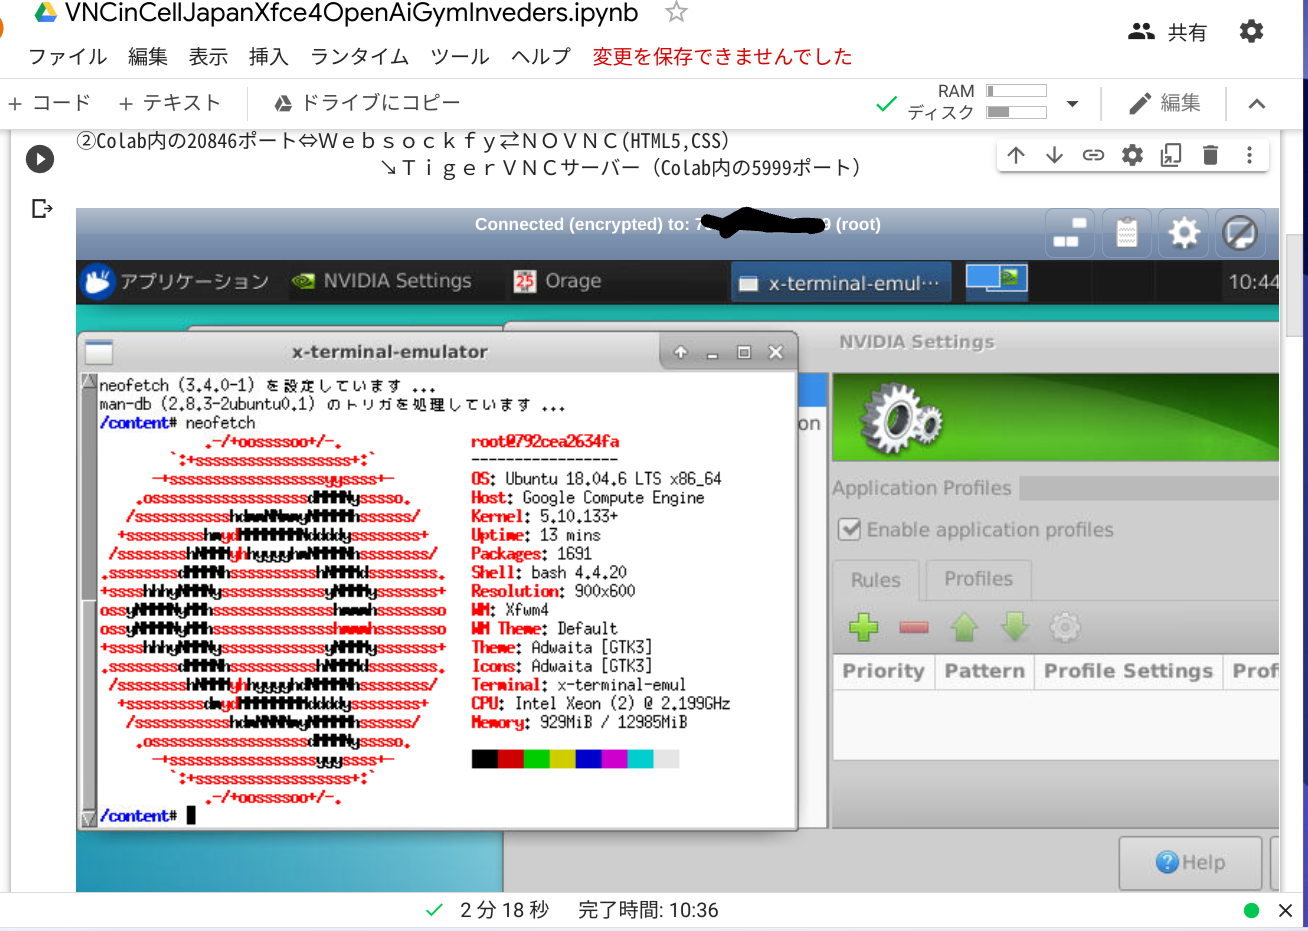


---



## Colabセル内のＮＯＶＮＣデスクトップにアーケードゲームをALEとAutoROMで実装して愉しむ

参照：
https://brosa.ca/blog/ale-release-v0.7

### パッケージとゲームROMのインストール（一度だけでいいです）

In [ ]:
#@title
!pip install ale-py -qq
!pip install autorom -qq
!AutoROM 
!ale-import-roms /usr/local/lib/python3.7/dist-packages/AutoROM/roms/
from IPython.display import clear_output
clear_output(True)

### 実行コード %%python セルマジック内で記載することでALE系のWindowが閉じない件の対策となる

In [4]:
%%python3
#参照 https://brosa.ca/blog/ale-release-v0.7
import os
os.environ["ALE_PY_ROM_DIR"]="/usr/local/lib/python3.7/dist-packages/AutoROM/roms/"
import gym
import time
new_step_api=True
env = gym.make(
#    'ALE/Breakout-v5',
    'ALE/SpaceInvaders-v5',
    obs_type='rgb',                   # ram | rgb | grayscale
    frameskip=2,                      # frame skip
    mode=None,                        # game mode, see Machado et al. 2018
    difficulty=None,                  # game difficulty, see Machado et al. 2018
    repeat_action_probability=0.25,   # Sticky action probability
    full_action_space=False,          # Use all actions
    render_mode="human"                  # None | human | rgb_array
)
env.reset()
for t in range(10000): 
        #env.render() ALE-v0.7にてSDL≒X11環境下では非推奨
        action = env.action_space.sample()    # ランダム方策
        done = env.step(action)[2]    # この環境のStepは５個のタプルを返すので２番めを終了フラグとして取り込む
        time.sleep(0.1)       
        if done:
            print("Episode finished after {} timesteps\n".format(t+1))
            env.reset()
            break

env.close() #'ALE/SpaceInvaders-v5'では、
#これをやっても何もなされない為にWindowが残り、再試行でクラッシュした。
#なので、%%python3 セルマジック内でコードした
exit(0)

Episode finished after 1141 timesteps



A.L.E: Arcade Learning Environment (version 0.8.0+919230b)
[Powered by Stella]
/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will 



---



## 月面着陸してみる

In [ ]:
#@title
#ref https://notebook.community/PyDataOkinawa/meetup021/3_openai_gym/01_openai_gym_introduction
%pip install gym[box2d] -qq
import gym
import time
new_step_api=True
env = gym.make('LunarLander-v2')#,render_mode="human")
#ref https://www.gymlibrary.dev/environments/atari/space_invaders/
for i_episode in range(10):    # 10エピソード回す
    observation = env.reset()    # 環境を初期化し、最初の観測を得る。

    for t in range(100):    # 各エピソードの最大ステップ数は100
        #env.render(mode="human")
        env.render()
        action = env.action_space.sample()    # ランダム方策
        done = env.step(action)[2]    # 選択行動の実行
        time.sleep(0.1)       
        if done:
            print("Episode finished after {} timesteps\n".format(t+1))
            break
env.close()

### ランタイムクラッシュ後の再試行はここから

尚、%%pythonセルマジック内で実行するなら問題なし

In [ ]:
#@title
#ランタイムクラッシュ後の再試行はここから%%pythonセルマジック内で実行するなら問題なし
import os
環境変数格納 = !cat /content/.env.run
for 個々の環境変数定義 in  環境変数格納 :
    (変数名, 設定値) = 個々の環境変数定義.split("=",maxsplit=1)
    os.environ[変数名]=f"{設定値}"
#os.environ["DISPLAY"]=":99.0" 



---





---



### 別窓リンク表示

In [ ]:
#@title
# 別窓表示
print(f"""
別窓で開く場合はこちらをクリック。
アクセス警告が出ますが。。。
{ＮＧＲＯＫホスト名}
""")

### xeyes,Xtermを起動してみる

In [ ]:
#@title
システムコール("xeyes &") 
システムコール("aterm-xterm &")  



---

